# Intro to using vaex with Gaia data

Using vaex, we have at least two ways of accessing the Gaia data.

## Access via S3
We can access the full dataset directly from S3, where the data will be cached locally on disk. This requires a computer with ~1 terabyte of harddrive, fast harddrive access, and/or reasonable amount of RAM to work interactively with the data. The advantage is that eventually, only the data that is accessed will be cached on disk, limiting waiting time.

In [1]:
# # Uncomment to access the data via S3
# import vaex
# df = vaex.open('s3://astrosurveydata/gaia_ps1_nochunk.hdf5?profile_name=stsci')
# df = df[:100_000_000]  # taking a subset may be useful for testing

## Access via STScI Science Platform
Since we will only work with filtering and aggregation, we can also decide to work with a so called 'remote dataframe''. All operations will be send to the cloud (the STScI cloud platform hosted on a powerful AWS machine), and the results will be send back. Agregations results such as 1d and 2d histogram are in the order of kilo to megabytes, versus the 1 terabytes full dataset, making them instantly available.

In [2]:
import vaex
with open('token.txt') as f:
    token = f.read().strip()
df = vaex.open(f'ws://ec2-18-222-183-211.us-east-2.compute.amazonaws.com:9000/gaia_ps1_nochunk?token_trusted={token}')#[:1_000_000]

## Inspecting the data
The `df` object, is a vaex dataframe, an object very similar to the popular [Pandas](https://pandas.pydata.org/) library. The [tutorial](https://docs.vaex.io/en/latest/tutorial.html) or [API documentation](https://docs.vaex.io/en/latest/api.html) can be useful, but we will go through a few of these steps in this notebook as well.

A dataframe (in this case a remote dataframe, or remote dataset holding the Gaia dataset), can be printed out in the notebook to get an overview of the tabular data, its rows and columns.

In [3]:
df

#,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,b,bestdetection,bp_g,bp_rp,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,designation,dist,duplicated_source,dvoregionid,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,ebv,ecl_lat,ecl_lon,flame_flags,frame_rotator_object_type,g_rp,gapmag,gapmagerr,gdec,gdecerr,gepoch,ginfoflag,ginfoflag2,ginfoflag3,gippdetectid,gkronmag,gkronmagerr,gnframes,gpsfmag,gpsfmagerr,gra,graerr,gstackdetectid,gstackimageid,iapmag,iapmagerr,idec,idecerr,iepoch,iinfoflag,iinfoflag2,iinfoflag3,iippdetectid,ikronmag,ikronmagerr,inframes,ippobjid,ipsfmag,ipsfmagerr,ira,iraerr,istackdetectid,istackimageid,l,lum_percentile_lower,lum_percentile_upper,lum_val,matched_observations,mean_varpi_factor_al,objid,p_dec,p_ra,parallax,parallax_error,parallax_over_error,parallax_pmdec_corr,parallax_pmra_corr,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_bp_n_obs,phot_bp_rp_excess_factor,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,priam_flags,primarydetection,processingversion,projectionid,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,randomstackobjid,rapmag,rapmagerr,rdec,rdecerr,ref_epoch,repoch,rinfoflag,rinfoflag2,rinfoflag3,rippdetectid,rkronmag,rkronmagerr,rnframes,rpsfmag,rpsfmagerr,rra,rraerr,rstackdetectid,rstackimageid,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,skycellid,solution_id,source_id,surveyid,teff_percentile_lower,teff_percentile_upper,teff_val,tessid,uniquepspsstid,visibility_periods_used,yapmag,yapmagerr,ydec,ydecerr,yepoch,yinfoflag,yinfoflag2,yinfoflag3,yippdetectid,ykronmag,ykronmagerr,ynframes,ypsfmag,ypsfmagerr,yra,yraerr,ystackdetectid,ystackimageid,zapmag,zapmagerr,zdec,zdecerr,zepoch,zinfoflag,zinfoflag2,zinfoflag3,zippdetectid,zkronmag,zkronmagerr,znframes,zpsfmag,zpsfmagerr,zra,zraerr,zstackdetectid,zstackimageid
0,nan,nan,nan,278.35400390625,0.463565430615808,1.49006002867494,2.0987000465393066,27,2,236,0,238,31,False,1.36373796564467,0.0336767775374772,0.2703999876976013,0.5764830112457275,5.3310062088769,1,0.9484689831733704,1.8842600584030151,-10.3091114009876,0.116378626203484,0.04726390168070793,0.29888901114463806,0.12965799868106842,b'Gaia DR2 30410948915',1.18388099435614e-05,False,96139,nan,nan,nan,0.22530299425125122,-31.3804098161502,118.376065081187,-9999,0,0.935791015625,19.6112003326416,0.003068000078201294,-10.3091215,0.0072778500616550446,56075.0212668,102760453,128,196608,7032,19.692699432373047,0.014081999659538269,8,19.599000930786133,0.010356999933719635,114.35555677,0.007036920171231031,2523191306964966264,4379137,17.695100784301758,0.0011759999906644225,-10.30911878,0.001237310003489256,55901.9228214,102760453,128,196608,7032,17.78689956665039,0.004135999828577042,8,412913860963485,17.714000701904297,0.0028639999218285084,114.35555695,0.0013052199501544237,2523204911005440888,4429816,227.395358246246,nan,nan,nan,29,0.00017986699822358787,95621143557289362,-10.30911843,114.35555883,0.957945085087802,0.180076371312301,5.319660186767578,-0.06908410042524338,0.2367289960384369,271.704423086766,6.51448995857181,41.707698822021484,19.26609992980957,24,1.314710021018982,887.719153204297,1.36522767468661,650.2349853515625,18.3176994323

In [4]:
len(df), len(df.get_column_names())

(928000000, 200)

This shows that we have a remote dataset with ~1 billion rows and 200 columns (i.e 1 terrabytes of data, the fully cross matched Gaia dataset!) at our fingertips.

A column, can be be printed out (similar to pandas), using the dot notation `df.<columnname>`, or dictonary like access `df['<columnname>']`

In [5]:
df.parallax

Expression = parallax
Length: 928,000,000 dtype: float64 (column)
-------------------------------------------
        0    0.957945
        1    0.446391
        2   -0.122053
        3    0.690934
        4    0.456829
         ...         
927999995    0.686679
927999996  -0.0156705
927999997     1.31439
927999998         nan
927999999    0.351357

In this case, `df.parallax` is an expression that refers directly to the column with the same name. It is of float64 type, and the first 5 and last 5 rows will be printed. Thus only 10 floating point values are being transferred from the remote machine, to where this notebook runs.

## Calculations

Often the columns as given are not sufficient for the science we want to do, and we need to do custom calculations, such as converting parallax to distance.

In [6]:
1/df.parallax

Expression = (1 / parallax)
Length: 928,000,000 dtype: float64 (expression)
-----------------------------------------------
        0    1.0439
        1   2.24019
        2  -8.19319
        3   1.44732
        4     2.189
        ...        
927999995   1.45628
927999996  -63.8143
927999997  0.760811
927999998       nan
927999999   2.84611

Vaex expressions can be used as regular numpy arrays, but they will not be evaluated eagerly, i.e. only the values that are needed (10 in this case) will be calculated. In this case, the expression `'1/distance'` will be send to the remote machine, where 10 distance values will be calculated, and send back. Note that for th

## Virtual/synthetic columns
Instead of having to work with the colums that are given to us, we can create virtual (sometimes called synthetic) columns, using `df['<columnname>'] = <expression>`:

In [7]:
df['distance'] = 1/df.parallax
df['G'] = df.phot_g_mean_mag  # a simple alias for the G magnitude

This makes it easier to work with the dataframe, that makes no distiction between real or virtual/synthetic columns. Note that nowhere does this virtual column takes up any significant memory. If we eagerly evaluated this column, it would take up ~8 gigabyte (GB) of memory, and would require us to download 8GB of data each time.

## Statistical calculations
Vaex has a [list of statistics](https://docs.vaex.io/en/latest/api.html#statistics) it can calculate on expressions. 

In [8]:
Gmin, Gmax = df.minmax(df.G)
Gmin, Gmax

(2.19587, 23.3486)

In [9]:
df.count(df.G)

array(928000000)

These statistical functions also take a `binby` argument (an expression or list of expressions) to calculate n-dimensional histograms, or other statics on a user defined regular grid.

In [10]:
import numpy as np
counts_per_G_magnitude_bin = df.count(binby=df.G, limits=[Gmin, Gmax], shape=100)
counts_per_G_magnitude_bin

array([       1,        0,        4,       15,       13,       22,
             39,       67,       94,      122,      173,      242,
            275,      365,      502,      596,      818,      955,
           1401,     1704,     2140,     2680,     3432,     4150,
           5278,     6458,     8119,    10166,    12400,    14980,
          18474,    22503,    27842,    33588,    41112,    49752,
          60733,    73464,    88535,   108176,   131385,   160103,
         190252,   227336,   271788,   324561,   388466,   462091,
         551445,   654551,   773805,   908998,  1080986,  1270957,
        1493034,  1746913,  2043733,  2378805,  2769624,  3217979,
        3731072,  4322385,  5022715,  5855631,  6741913,  7654017,
        8774682,  9990271, 11324274, 12822996, 14511570, 16359220,
       18418091, 20742206, 23430286, 26403810, 29876342, 33848239,
       38286942, 42763915, 47256099, 51838200, 56170444, 60370628,
       63864528, 66988316, 69239001, 66684531, 52497482, 25939

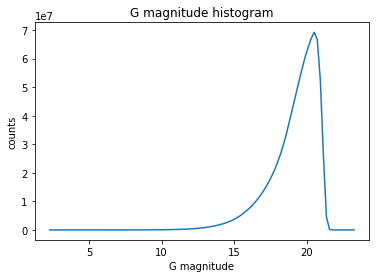

In [11]:
import matplotlib.pylab as plt

Gdelta = (Gmax - Gmin)/100
centers_G_magnitude_bins = np.linspace(Gmin + Gdelta/2, Gmax+Gdelta/2, 100, endpoint=False)

plt.plot(centers_G_magnitude_bins, counts_per_G_magnitude_bin)
plt.title('G magnitude histogram')
plt.xlabel('G magnitude')
plt.ylabel('counts');

Since this is quite common, [vaex has a builtin method to do this](https://docs.vaex.io/en/latest/api.html#vaex.dataframe.DataFrame.plot1d)

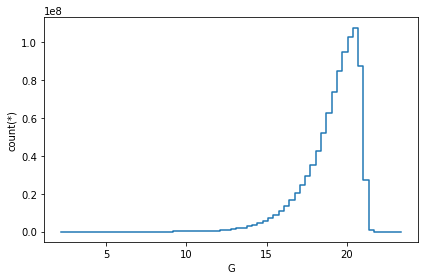

In [12]:
df.plot1d(df.G, limits=[Gmin, Gmax])

## Going two dimensional
If we pass binby, limits and shape a list of arguments, we can make higher dimensional histograms.

In [13]:
limits_ra = [0, 360]
limits_dec = [-90, 90]
counts_per_sky_element = df.count(binby=[df.ra, df.dec], limits=[limits_ra, limits_dec], shape=[400,200], progress=True)
counts_per_sky_element

[----------------------------------------]:   0.00% estimated time: unknown                 

array([[  0,   0,   0, ..., 273, 133,  44],
       [  0,   0,   0, ..., 239, 173,  56],
       [  0,   0,   0, ..., 255, 141,  53],
       ...,
       [  0,   0,   0, ..., 261, 184,  33],
       [  0,   0,   0, ..., 227, 161,  41],
       [  0,   0,   0, ..., 255, 152,  45]])

[########################################]:  100.00% elapsed time  :        1s =  0.0m =  0.0h
 

Which we can visualize using matplotlib's imshow.

/Users/maartenbreddels/src/ipython/ipykernel/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


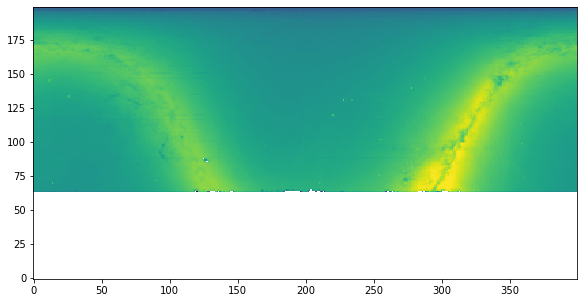

In [14]:
plt.figure(figsize=(10,5))
plt.imshow(np.log10(counts_per_sky_element).T, origin='lower')

Again, [vaex has a method to do this common operation](https://docs.vaex.io/en/latest/api.html#vaex.dataframe.DataFrame.plot):

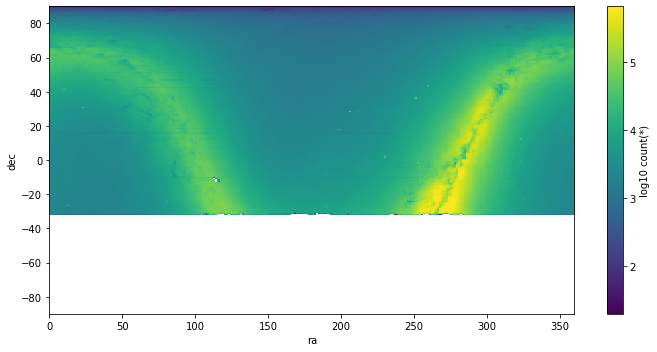

In [15]:
df.plot(df.ra, df.dec, limits=[limits_ra, limits_dec], f='log10', colormap='viridis', figsize=(10,5))

## Other statistics
Instead of using count, we can also calculate the mean in each bin, using the [df.mean](https://docs.vaex.io/en/latest/api.html#vaex.dataframe.DataFrame.mean) method.

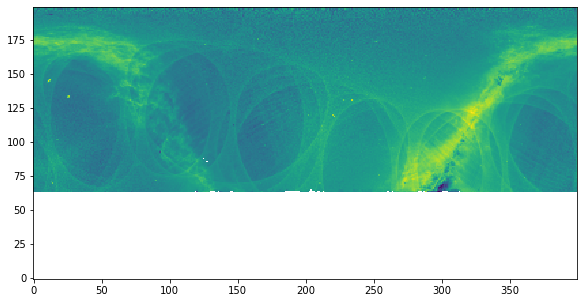

In [16]:
mean_G_magntiude_per_sky_element = df.mean(df.G, binby=[df.ra, df.dec], limits=[limits_ra, limits_dec], shape=[400,200])
plt.figure(figsize=(10,5))
plt.imshow(mean_G_magntiude_per_sky_element.T, origin='lower')

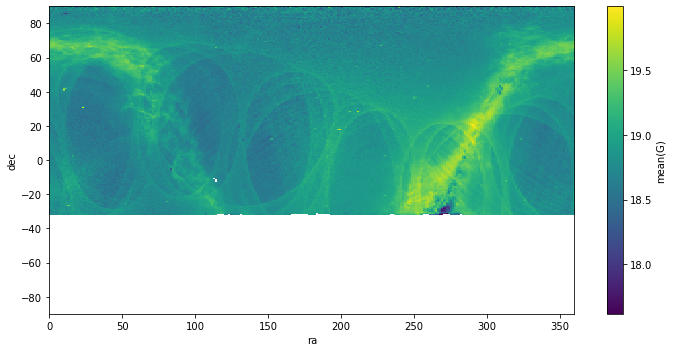

In [17]:
# or using plot
df.plot(df.ra, df.dec, limits=[limits_ra, limits_dec], colormap='viridis', figsize=(10,5), what=vaex.stat.mean(df.G))

In [18]:
## Making a 

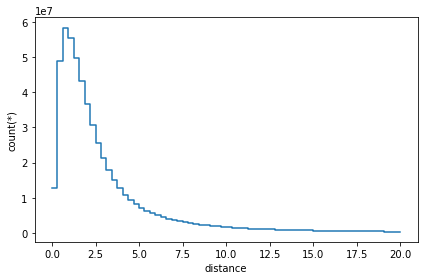

In [19]:
df.plot1d(df.distance, limits=[0, 20])

In [20]:
# A nicer alias for the Bp color
df['Bp'] = df.phot_bp_mean_mag
# Note that here we keep the original expression around (not add a virtual expression)
# which will automatically generate nicer labels when plotting
color = df.Bp - df.G
# For the absolute magnitude we don't want to see the whole expression
# so we create a virtual columns
df['M_G'] = df.phot_g_mean_mag - 5 * np.log10(df.distance) - 10

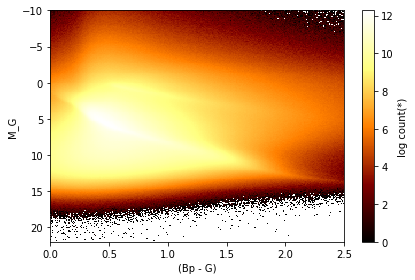

In [21]:
df.plot(color, df.M_G, limits=[[0, 2.5], [22, -10]], f='log')

# Filtering and selections data
We have seen we can add virtual columns, which we can use later on for statistical calculations, which can be used for visualizations.

We have used all the data up till now. Using filtering and selections, we can work on subsets of the data instead.

Filtering and selections are quite similar, the difference is in when you use it.

## Filtering

Using `df_filtered = df[<boolean expression>]` we can make a new dataframe, which will only use the rows matching the boolean expression. A common pattern is to reassign to `df`, in you are certain you don't need the unfiltered dataframe.

In [22]:
df = df[df.distance > 0]

In [23]:
df

#,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,b,bestdetection,bp_g,bp_rp,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,designation,dist,duplicated_source,dvoregionid,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,ebv,ecl_lat,ecl_lon,flame_flags,frame_rotator_object_type,g_rp,gapmag,gapmagerr,gdec,gdecerr,gepoch,ginfoflag,ginfoflag2,ginfoflag3,gippdetectid,gkronmag,gkronmagerr,gnframes,gpsfmag,gpsfmagerr,gra,graerr,gstackdetectid,gstackimageid,iapmag,iapmagerr,idec,idecerr,iepoch,iinfoflag,iinfoflag2,iinfoflag3,iippdetectid,ikronmag,ikronmagerr,inframes,ippobjid,ipsfmag,ipsfmagerr,ira,iraerr,istackdetectid,istackimageid,l,lum_percentile_lower,lum_percentile_upper,lum_val,matched_observations,mean_varpi_factor_al,objid,p_dec,p_ra,parallax,parallax_error,parallax_over_error,parallax_pmdec_corr,parallax_pmra_corr,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_bp_n_obs,phot_bp_rp_excess_factor,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,priam_flags,primarydetection,processingversion,projectionid,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,randomstackobjid,rapmag,rapmagerr,rdec,rdecerr,ref_epoch,repoch,rinfoflag,rinfoflag2,rinfoflag3,rippdetectid,rkronmag,rkronmagerr,rnframes,rpsfmag,rpsfmagerr,rra,rraerr,rstackdetectid,rstackimageid,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,skycellid,solution_id,source_id,surveyid,teff_percentile_lower,teff_percentile_upper,teff_val,tessid,uniquepspsstid,visibility_periods_used,yapmag,yapmagerr,ydec,ydecerr,yepoch,yinfoflag,yinfoflag2,yinfoflag3,yippdetectid,ykronmag,ykronmagerr,ynframes,ypsfmag,ypsfmagerr,yra,yraerr,ystackdetectid,ystackimageid,zapmag,zapmagerr,zdec,zdecerr,zepoch,zinfoflag,zinfoflag2,zinfoflag3,zippdetectid,zkronmag,zkronmagerr,znframes,zpsfmag,zpsfmagerr,zra,zraerr,zstackdetectid,zstackimageid,distance,G,Bp,M_G
0,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error
1,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,error,err

TODO: why does this give errors?

Internally, vaex will remember the filter expression, and will send that to the server. At no moment will there by any copy of the data (remember 1 terabyte). 

## Selections
In the case of the distance filter, we know pretty well that we don't want any negative distance. In many cases you don't know for sure, and you want to explore a bit what are the best way to filter your dataframe.

All the statistical methods, and the visualization methods take a `selection=<boolean expression>` argument, or even a list of selections `selection=[<boolean expression>, ...]`.

In [24]:
print(df.count(selection=df.parallax/df.parallax_error > 3)/1e6, 'million stars')

155.876149 million stars


### Named selections
If this selection is going to be used a lot, it is also possible to add a so called named selection (where the default name is `default`). The advantage of named selections is that vaex can internally do some caching, so in general it will be faster.

In [25]:
df.select(
    (df.parallax/df.parallax_error > 10) &\
    (df.distance < 1) &\
    (df.phot_g_mean_flux_over_error > 2000)
    , name='default')

In [26]:
print(df.count(selection='default')/1e6, 'million stars')

9.457328 million stars


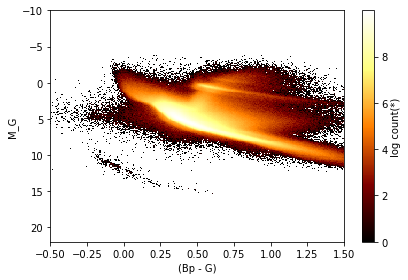

In [27]:
df.plot(color, df.M_G, limits=[[-0.5, 1.5], [22, -10]], f='log', selection='default')

# UDFs: User defined functions

Since vaex supports many numpy functions, we can do many transformations of the data, for instance a transformation of spherical to cartesian coordinates. Vaex comes with many transformation already included, for instance:

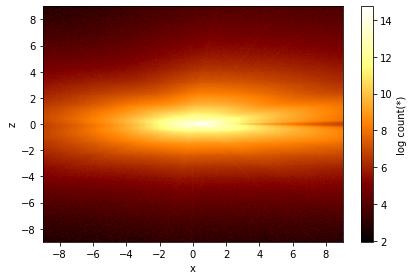

In [28]:
# We don't need to do this manually
# df_extra = df.copy()
# df_extra['x'] = np.cos(df.l) * np.cos(df.b) * df.distance
# df_extra['y'] = np.sin(df.l) * np.cos(df.b) * df.distance
# df_extra['z'] = np.sin(df.b) * df.distance
# this is much shorter and less error prone

df_extra = df.geo.spherical2cartesian(df.l, df.b, df.distance)
df_extra.plot('x', 'z', limits=[-9, 9], f='log')

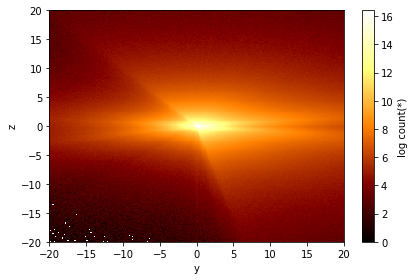

In [29]:
df_extra.plot('y', 'z', limits=[-20, 20], f='log')

However, it can happpen that a function cannot simply be expressed using basic numpy function (for instance if statements). In this case it is possible to add a new function to vaex.

In [30]:
# if we pass vaex expressions to this function, it will fail (since astropy expects real numpy arrays somewhere)
def sky_separation(ra, dec, ra0, dec0, frame='icrs'):
    from astropy.coordinates import SkyCoord
    import astropy.units as u
    c1 = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame=frame)
    c2 = SkyCoord(ra=ra0*u.degree, dec=dec0*u.degree, frame=frame)
    return np.array(c1.separation(c2)  )
# However, we can add a new function to vaex
sky_separation = df.add_function('sky_separation', sky_separation)

In [31]:
sky_separation(df.ra, df.dec, 0, 0)

Expression = sky_separation(ra, dec, 0, 0)
Length: 560,489,051 dtype: float64 (expression)
-----------------------------------------------
        0  113.938
        1  113.941
        2  113.946
        3  113.941
        4  113.943
       ...        
560489046  111.589
560489047  111.592
560489048  111.589
560489049  111.598
560489050  111.597

In [32]:
df['seperation_center'] = sky_separation(df.ra, df.dec, 0, 0)

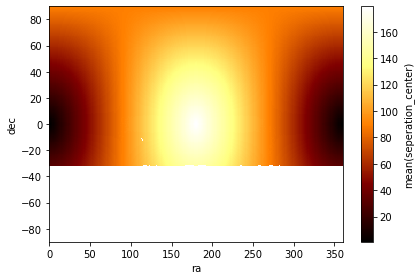

In [33]:
df.plot(df.ra, df.dec, what=vaex.stat.mean(df.seperation_center),  limits=[limits_ra, limits_dec])

Vaex will serialize (pickle) the function, send it to the remote machine. On the remote machine, the function is being applied on a chunk by chunk basis (with real numpy arrays). Note that this allows for arbitrary code execution, which is a security risk, and therefore requires the secret token (token_trusted) when connecting. Only trusted users (you) will be given this token, please use this feature wisely.


# Next

 * Please go through the [tutorial](https://docs.vaex.io/en/latest/tutorial.html) to learn about:
   * Interactive visualization
   * Error/uncertainty propagation

* Or check out the voila notebooks for interactive dashboards

